In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [5]:
X = np.asanyarray(df[['tenure','age','income','ed','employ']])
Y = np.asanyarray(df['churn'])

## Creating Training and Test data set 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(140, 5) (60, 5)
(140,) (60,)


## Traning the Logistic Regression Model 

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.02, solver = 'liblinear').fit(X_train, Y_train)

In [17]:
yHat = model.predict(X_test)
yHat_Prob = model.predict_proba(X_test)

In [32]:
yHat_Prob[:5,1:2]

array([[0.1454348 ],
       [0.46470912],
       [0.1206272 ],
       [0.05602596],
       [0.05319382]])

## Evaluation 

In [94]:
from sklearn import metrics

print('The Accuracy Score is', metrics.accuracy_score(Y_test, yHat))
print('The Jacquard Accuracy Index is', metrics.jaccard_similarity_score(Y_test, yHat))
print('')
print('F1-Score')
print(metrics.classification_report(Y_test, yHat))

The Accuracy Score is 0.75
The Jacquard Accuracy Index is 0.75

F1-Score
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84        41
         1.0       0.83      0.26      0.40        19

   micro avg       0.75      0.75      0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60



Text(0, 0.5, 'Probability')

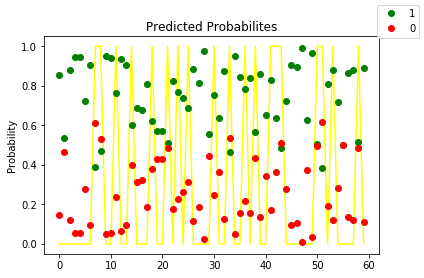

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(yHat_Prob, columns = ['1','0'])
plt.plot(Y_test,color = 'yellow')
plt.plot(df['1'], 'bo',color = 'GREEN' )
plt.plot(df['0'],'bo', color = 'RED')
plt.figlegend()
plt.title('Predicted Probabilites')
plt.ylabel('Probability')